# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data']           # matriz con los datos de entrada (atributos)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston['target']         # vector de valores a predecir

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [7]:
type(boston) 

sklearn.utils.Bunch

In [8]:
# gráficos con más resolución
sns.set_context(context='talk', font_scale=0.6)

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación.

In [10]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_validation.shape

((404, 13), (102, 13))

In [11]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
y.shape

(506,)

In [13]:
X.shape

(506, 13)

In [14]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**


1. Se trata de 506 pares (x_i, y_i) (towns) donde cada uno representa según entendimos, una x_i zona de agrupaciones de viviendas en Boston, con un valor asociado y_i. Cada zona x_i contiene 13 atributos numéricos, salvo por CHAS que es categórico (dimensión K=13), y un valor y_i asociado perteneciente al vector `target` que refiere al precio promedio de viviendas ocupadas por sus propietarios en miles de dólares en esa zona. Este conjunto de datos representa un problema de regresión de aprendizaje automático supervisado, ya que nuestro vector de salida es del tipo número real. 

2. La variable objetivo a predecir es `target` (MEDV) que es el precio promedio de viviendas por town de Boston, expresado en miles de dólares. `target` es un vector de 13 dimensiones que contiene los valores esperados de predicción para cada atributo.

3. **Atributos:**
  1. CRIM tasa de criminalidad per cápita por town

  2. ZN Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.

  3. INDUS Proporción de acres comerciales no minoristas por town.

  4. CHAS 
      * = 1 si el tramo limita con el río
      * = 0 en caso contrario

  5. NOX Concentración de óxidos nítricos (partes por 10 millones)

  6. RM promedio de cuartos por vivienda

  7. AGE proporción de unidades ocupadas por propietarios construidas antes de 1940

  8. DIS Distancias ponderadas a cinco centros de empleo de Boston

  9. RAD Índice de accesibilidad a carreteras radiales

  10. TAX Tasa de impuesto a la propiedad de valor total por cada $10,000

  11. PTRATIO proporción de alumnos por profesor, por town

  12. B [1000(Bk - 0.63)^2] donde Bk es la proporción de personas negras por town

  13. LSTAT propoción de poblacion con nivel socio-económico bajo por town

4. Los atributos que imaginamos serán los más determinantes para la predicción del precio son los que dan conocimiento de comercios mayoristas (INDUS), estado de contaminación (NOX), cantidad de cuartos (RM),  seguridad (CRIM) y nivel socio-económico (LSTAT).
5. B muestra un problema ético de discriminación racial y también da a entender que existe un sesgo respecto a esta variable. También observamos que no está bien definido el espacio que representa un registro, suponemos que es una agrupación de casas, barrio o municipio debido a la mención de 'town', ya que el vector `target` es un valor promedio.


**Advertencia** 

El conjunto de datos de precios de la vivienda de Boston tiene un problema ético: como se investigó en [1] , los autores de este conjunto de datos diseñaron una variable no invertible "B" asumiendo que la autosegregación racial tuvo un impacto positivo en los precios de la vivienda [2] . Además, el objetivo de la investigación que condujo a la creación de este conjunto de datos fue estudiar el impacto de la calidad del aire, pero no brindó una demostración adecuada de la validez de esta suposición.


Por lo tanto, los mantenedores de scikit-learn desaconsejan encarecidamente el uso de este conjunto de datos a menos que el propósito del código sea estudiar y educar sobre cuestiones éticas en la ciencia de datos y el aprendizaje automático.


**REFERENCIAS**


[1] ¿Destrucción de datos racista? M. Carlisle, https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.


[2]
Harrison Jr, David y Daniel L. Rubinfeld. “Los precios hedónicos de la vivienda y la demanda de aire limpio”. Revista de economía y gestión ambiental 5.1 (1978): 81-102., https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air

LSTAT 

De la documentación del conjunto de datos en la Tabla IV de Harrison & Rubin (1978), LSTAT se define como:
Proporción de la población que tiene un estatus más bajo = 1/2 (proporción de adultos sin educación secundaria y proporción de trabajadores varones clasificados como peones). La especificación logarítmica implica que las distinciones de estatus socioeconómico significan más en los tramos superiores de la sociedad que en las clases inferiores. Fuente: Censo de EE. UU. de 1970

https://opendata.stackexchange.com/questions/15740/what-does-lower-status-mean-in-boston-house-prices-dataset

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

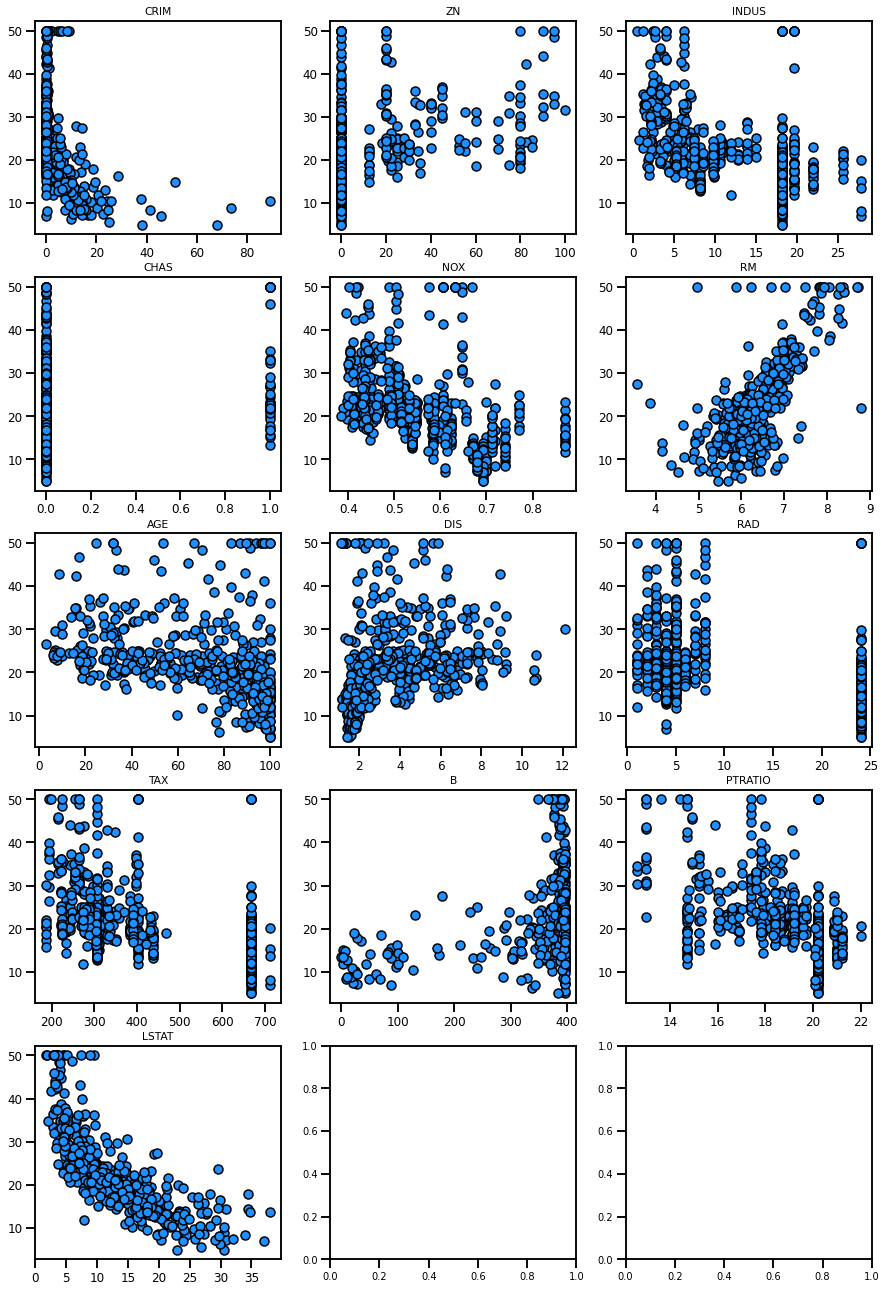

In [15]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'B', 'PTRATIO', 'LSTAT']

plt.subplots(5,3,figsize=(15,16))
plt.subplots_adjust(top=1.2)

for feature in features:
  plt.subplot(5,3,features.index(feature)+1)
  selector = (boston['feature_names'] == feature)
  plt.scatter(
      X[:, selector], y, 
      facecolor="dodgerblue", 
      edgecolor="k", label="datos"
  )
  plt.title(feature)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
plt.show()

Ya que `B` está sesgada, no la tomaremos en cuenta.
Se busca conocer la correlaciones entre las mismas features, para poder obtener el mayor provecho de las variables a elegir, ya que cuando tenemos menos correlación entre dos variables, cada una nos da distinta información para entrenar al modelo. 

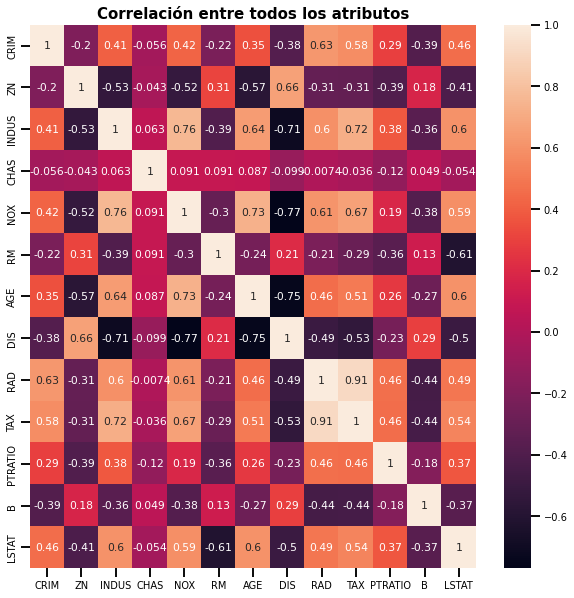

In [ ]:
# Graficamos un mapa de calor
fig = plt.figure(figsize=(10,10))
plt.title('Correlación entre todos los atributos', 
            loc='center', fontsize=15, fontweight='bold'
)
X_df = pd.DataFrame(X, columns=boston['feature_names'])
corr_matrix = X_df.corr()
sns.heatmap(corr_matrix, fmt='.2g', annot=True)

> Seleccionamos las siguientes columnas en orden descendente de importancia, considerando su correlación en los gráficos de dispersión con la variable `target` que es nuestro vector Y. Además, visualizamos y tuvimos en cuenta su nivel de correlación con el mapa de calor anterior.
Por otro lado, explicaremos lo que su significado importa en este sentido.

1. LSTAT: Describe la proporción de gente con nivel socio-económico bajo de la zona, por lo que, cuando hablamos de un valor cada vez mayor de esta variable, la ciudad más se acerca a la pobreza. Por esta razón es esperable que a medida de que crezca la proporción de clase baja, se aminoren las características favorables para vivir en esa zona, decreciendo su precio.
2. RM: El número de cuartos es una característica del interior de la vivienda escencial para buscar un lugar donde vivir. Su promedio por zona es una buena métrica a considerar. Ya que más construcción requiere mayores costos, es esperable que el precio aumente a medida que incremente la cantidad de cuartos. 
3. CRIM: La seguridad es también una característica importante al momento de escoger una vivienda dentro de las posibilidades. Por eso creemos lógico que a mayor seguridad en la zona el precio también aumente.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### 3.1. Seleccionamos el atributo 'LSTAT'

In [19]:
feature = 'LSTAT'  
selector = (boston['feature_names'] == feature)
# seleccionamos los datos de la dimensión LSTAT 
# del subvector X de entrenamiento para constituir los datos de entrenamiento
X_train_f = X_train[:, selector]
# seleccionamos los datos de la dimensión LSTAT 
# del subvector X de validación para constituir los datos de validación
X_validation_f = X_validation[:, selector]

X_train_f.shape, X_validation_f.shape

((404, 1), (102, 1))

In [20]:
X_train_f[:5]

array([[ 9.71],
       [ 9.88],
       [11.38],
       [12.43],
       [26.64]])

In [21]:
# transformamos los arreglos a una sola dimensión 
# para poder trabajarlos como una secuencias
X_train_f = X_train_f.flatten()
X_validation_f = X_validation_f.flatten()
X_train_f.shape, X_validation_f.shape

((404,), (102,))

In [22]:
X_train_f[:5]

array([ 9.71,  9.88, 11.38, 12.43, 26.64])

### 3.2. Instanciar y entrenar

In [23]:
def linear_least_squares(X, y):
    """
    Encuentra los dos coeficientes aproximados w0 y w1 para un modelo lineal, 
    a partir de la resolución de un sistema lineal por cuadrados mínimos.
    En el vector de entrada X de K=1 dimensión, se le agrega un valor constante
    1 a cada dato x_i, lo que llevará a X a dimensión k=2, para considerar 
    el término de bias
    """
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

# entrenar: calcular los coeficientes w_0 y w_1
w = linear_least_squares(X_train_f, y_train)

In [24]:
w

array([-0.95648761, 34.76519272])

### 3.3. Predecir y evaluar

In [25]:
from sklearn.metrics import mean_squared_error

# función de predicción
def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

# predecir
y_train_pred = f(X_train_f, w)
y_validation_pred = f(X_validation_f, w)

# evaluar el error cuadrático medio de ambos conjuntos
train_error = mean_squared_error(y_train, y_train_pred)
validation_error = mean_squared_error(y_validation, y_validation_pred)
print(f'Train error: {train_error:f}')
print(f'Validation error: {validation_error:f}')

Train error: 36.523966
Validation error: 46.336305


El error de entrenamiento es menor que el de validación, lo cual es esperable pues el modelo se entrenó con los datos de entrenamiento y no conoce los de validación.

### 3.4. Graficar

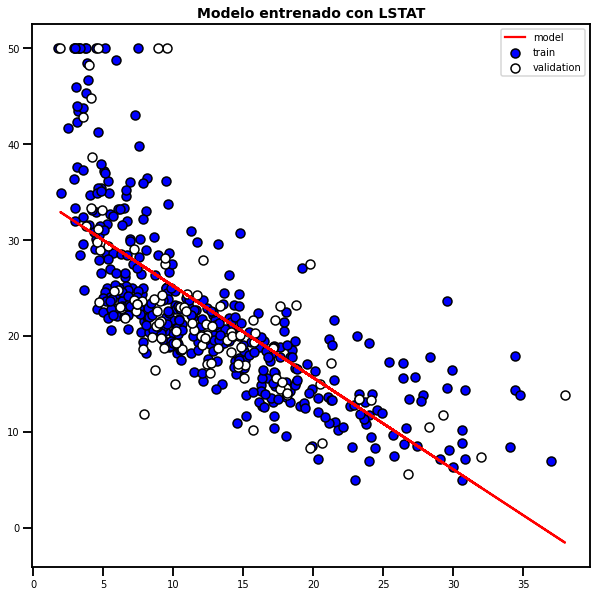

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train_f, y_train, color="blue", edgecolor="k", label="train")
plt.scatter(X_validation_f, y_validation, color="white", edgecolor="k", label="validation")
plt.plot(X_validation_f, y_validation_pred, color="red", label="model")
plt.title("Modelo entrenado con "+feature, fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### 3.5. Interpretacion del modelo resultante


El modelo generado replica con bastante presición el comportamiento de los datos reales. Esto tiene que ver con que la característica seleccionada (LSTAT) tiene comportamiento casi lineal.

Es claro que no hay overfitting pues los grados de libertad es 1 (al ser un polinomio lineal) contra 102 puntos.

El modelo se ajusta a los datos en gran parte con un error cuadrático medio de 46,33 ya que los datos tienen mucha dispersion. Por la dispersion de los puntos se podria pensar en un polinomio de orden 3 para representar estos datos.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [27]:
X_train_f= X_train_f.reshape(-1, 1)
X_validation_f = X_validation_f.reshape(-1, 1)
X_train_f.shape, X_validation_f.shape

((404, 1), (102, 1))

### 4.1 Regresion polinomial para varias grados de polinomios

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [29]:
train_errors = []
validation_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_validation_pred = model.predict(X_validation_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    validation_error = mean_squared_error(y_validation, y_validation_pred)
    train_errors.append(train_error)
    validation_errors.append(validation_error)    
  

In [ ]:
train_errors, validation_errors

([85.1437202235075,
  36.52396640695966,
  28.18917233416823,
  26.78484649674975,
  25.84943285886594,
  25.03496253774958,
  25.014028004243563,
  25.01353497094333,
  24.845822983562897,
  24.825939935650403,
  30.346069313704685,
  57.81077517166637],
 [81.58231743908232,
  46.336305360025946,
  38.8468686617073,
  37.224242268440385,
  34.70486859830834,
  34.83470818133642,
  34.32620655264877,
  34.26108257555098,
  36.4152853596215,
  34.91600456401158,
  61.42786978295529,
  530.0413132022268])

### 4.2 Graficos de curvas de error

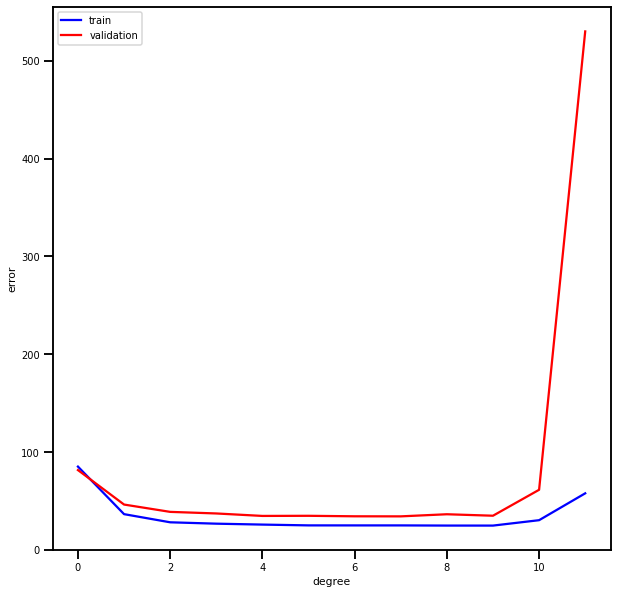

In [30]:
plt.figure(figsize=(10,10))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, validation_errors, color="red", label="validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### 4.3 Interpretacion d elas curva de error

Se puede ver que el error en entrenamiento siempre baja, pero que en el punto 9(nueve) comienza el sobreajuste, ya que el error en evaluación empieza a subir abruptamente, marcando una fuerte diferencia entre el error de entrenamiento y el de validacion, entendiendo que el modelo ya no generaliza y este esta sobreajustado.


### 4.4 Reconstruimos y graficamos el mejor modelo

In [31]:
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [32]:
lr.coef_

array([43.1090092 , -2.36696305,  0.04463347])

In [33]:
lr.intercept_

0.0

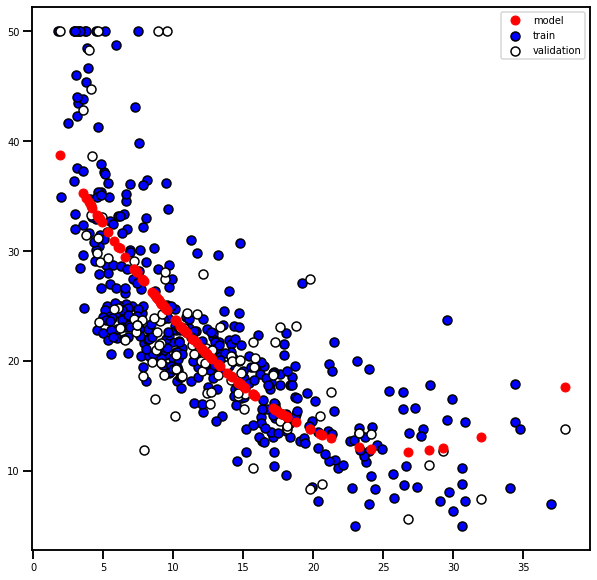

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train_f, y_train, color="blue",edgecolor="k", label="train")
plt.scatter(X_validation_f, y_validation, color="white", edgecolor="k", label="validation")
plt.plot(X_validation_f, model.predict(X_validation_f), 'ro', color="red", label="model")
plt.legend()
plt.show()

### 4.5 Interpretasion del modelo resultante

 El modelo elegido es de grado=2, creemos que es el que mejor generaliza a nuestro Target , aunque el modelo de grado=4 da un error mas bajo creemos que esto acurre por la aletoriedad de la toma de los datos de validacion.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [36]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((404, 13), (102, 13), (404,), (102,))

In [37]:
y_train = y_train.reshape(-1, 1)
y_validation = y_validation.reshape(-1, 1)

### 5.1 Seleccion de atributos 



1.  LSTAT: Describe la proporción de gente con nivel 
socio-económico bajo de la zona, por lo que, cuando hablamos de un valor cada vez mayor de esta variable, la ciudad más se acerca a la pobreza. Por esta razón es esperable que a medida de que crezca la proporción de clase baja, se aminoren las características favorables para vivir en esa zona, decreciendo su precio.
2.   RM: El número de cuartos es una característica del interior de la vivienda escencial para buscar un lugar donde vivir. Su promedio por zona es una buena métrica a considerar. Ya que más construcción requiere mayores costos, es esperable que el precio aumente a medida que incremente la cantidad de cuartos.





In [38]:
from sklearn.linear_model import LogisticRegression

selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM' )
X_train_fs = X_train[:, selector]
X_validation_fs = X_validation[:, selector]
y_train_fs = y_train
y_validation_fs = y_validation

X_train_fs.shape, X_validation_fs.shape, y_train_fs.shape, y_validation_fs.shape

((404, 2), (102, 2), (404, 1), (102, 1))

### 5.2 Modelo Regesion Polinomial de distintos grados

In [45]:
train_errors_5 = []
validation_errors_5 = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train_fs)
    
    # predict:
    y_train_pred_5 = model.predict(X_train_fs)
    y_validation_pred_5 = model.predict(X_validation_fs)
    
    # evaluate:
    train_error_5 = mean_squared_error(y_train_fs, y_train_pred_5)
    validation_error_5 = mean_squared_error(y_validation_fs, y_validation_pred_5)
    
    train_errors_5.append(train_error_5)
    validation_errors_5.append(validation_error_5)

In [46]:
train_errors_5, validation_errors_5


([28.790276482053443,
  18.659453833139377,
  17.07775402237082,
  14.188503706315354,
  12.9056137301668,
  12.352155209827565,
  12.206436905281569,
  11.943062061139937],
 [37.383105638779945,
  28.144971863124756,
  28.567166435267858,
  33.999233405723935,
  34.20141357060207,
  34.92463965396957,
  70.25987498598042,
  545.4189865207986])

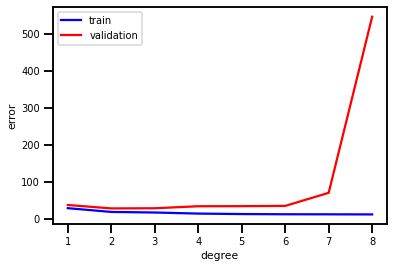

In [47]:
plt.plot(degrees, train_errors_5, color="blue", label="train")
plt.plot(degrees, validation_errors_5, color="red", label="validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

#### Mejor modelo grado =2

In [48]:
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model_2 = make_pipeline(pf, lr)

model_2.fit(X_train_fs, y_train_fs)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
lr.coef_

array([[ 5.84538051e+01, -1.46867521e+01,  5.12342260e-01,
         1.69773861e+00, -2.64734538e-01,  1.08556128e-02]])

In [ ]:
lr.intercept_

0.0

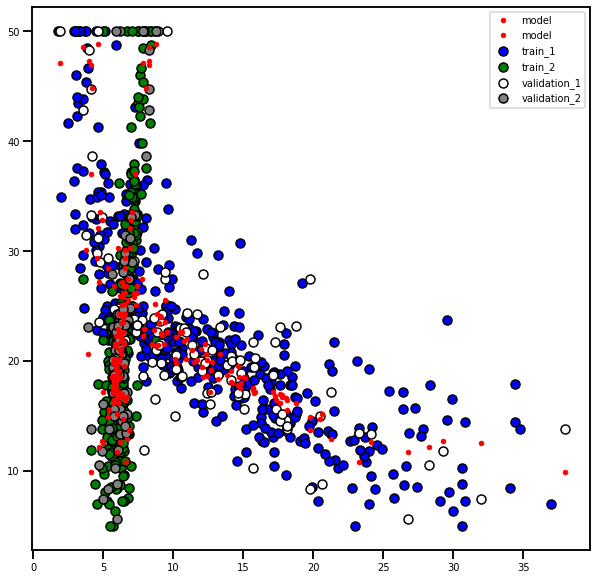

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train_fs[:,1], y_train_fs, color="blue",edgecolor="k", label="train_1")
plt.scatter(X_train_fs[:,0], y_train_fs, color="green",edgecolor="k", label="train_2")
plt.scatter(X_validation_fs[:,1], y_validation_fs, color="white", edgecolor="k", label="validation_1")
plt.scatter(X_validation_fs[:,0], y_validation_fs, color="gray", edgecolor="k", label="validation_2")
plt.plot(X_validation_fs, model.predict(X_validation_fs), 'r.', color="red", label="model")
plt.legend()
plt.show()

### 5.3 Interpretacion de resultados

----

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
